In [ ]:
# 콜레스테롤 예측 모델(실패)


In [2]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

In [3]:
# 1. CSV 파일 불러오기
file_path = "./data/health_2023_cleaned_final.csv"
df = pd.read_csv(file_path, encoding='utf-8', sep=',')

In [4]:
df = pd.read_csv('./data/health_2023_cleaned_final.csv', encoding='utf-8')
df = df[['성별코드', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)', '허리둘레', '총콜레스테롤']].dropna()

In [5]:
X = df.drop(columns='총콜레스테롤').values
y = df['총콜레스테롤'].values

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)  # (샘플 수, 타임스텝, 채널)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# 4. MLP 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # 회귀 출력
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 5. 학습
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

c:\ProgramData\Anaconda3\envs\tf310_v2\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
6655/6655 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 5867.9443 - mae: 53.2243 - val_loss: 1609.9282 - val_mae: 31.8255
Epoch 2/50
6655/6655 ━━━━━━━━━━━━━━━━━━━━ 7s 985us/step - loss: 1626.6090 - mae: 31.8826 - val_loss: 1608.7328 - val_mae: 31.6951
Epoch 3/50
6655/6655 ━━━━━━━━━━━━━━━━━━━━ 7s 996us/step - loss: 1614.1436 - mae: 31.7959 - val_loss: 1592.9696 - val_mae: 31.5650
Epoch 4/50
6655/6655 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 1612.6132 - mae: 31.7642 - val_loss: 1596.0719 - val_mae: 31.6579
Epoch 5/50
6655/6655 ━━━━━━━━━━━━━━━━━━━━ 7s 996us/step - loss: 1609.0760 - mae: 31.7237 - val_loss: 1600.8682 - val_mae: 31.5820
Epoch 6/50
6655/6655 ━━━━━━━━━━━━━━━━━━━━ 7s 995us/step - loss: 1616.2958 - mae: 31.7906 - val_loss: 1599.7147 - val_mae: 31.5570
Epoch 7/50
6655/6655 ━━━━━━━━━━━━━━━━━━━━ 7s 1000us/step - loss: 1608.4387 - mae: 31.7314 - val_loss: 1597.3036 - val_mae: 31.6632
Epoch 8/50
6655/6655 ━━━━━━━━━━━━━━━━━━━━ 7s 996us/step - loss: 1622.5593 - mae: 31.8451 - va

📊 MLP 회귀 모델 성능 평가
MAE  (평균 절대 오차): 0.18
MSE  (평균 제곱 오차): 0.05
RMSE (평균 제곱근 오차): 0.22
R²   (설명력): 0.2185


C:\Users\user\AppData\Local\Temp\ipykernel_35852\4085631341.py:28: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_35852\4085631341.py:28: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_35852\4085631341.py:28: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_35852\4085631341.py:28: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_35852\4085631341.py:28: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_35852\4085631341.py:28: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font

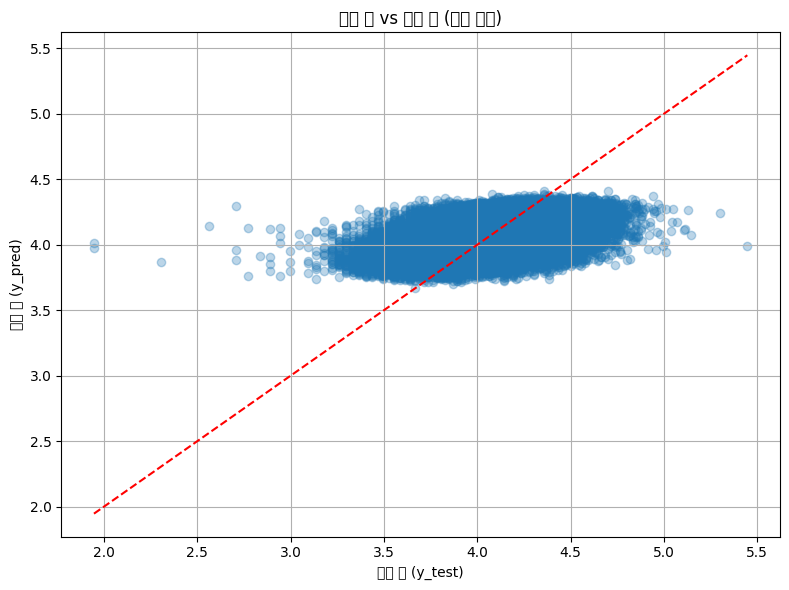

In [15]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. 예측
y_pred = model.predict(X_test)

# 2. 평가 지표 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"📊 MLP 회귀 모델 성능 평가")
print(f"MAE  (평균 절대 오차): {mae:.2f}")
print(f"MSE  (평균 제곱 오차): {mse:.2f}")
print(f"RMSE (평균 제곱근 오차): {rmse:.2f}")
print(f"R²   (설명력): {r2:.4f}")

# 3. 예측 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("실제 값 (y_test)")
plt.ylabel("예측 값 (y_pred)")
plt.title("실제 값 vs 예측 값 (회귀 결과)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 기준선
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

# 1. 데이터 불러오기
df = pd.read_csv("./data/health_2023_cleaned_final.csv")

# 2. 파생 변수 생성
df['BMI'] = (df['체중(5kg단위)'] + 2.5) / ((df['신장(5cm단위)'] + 2.5) / 100) ** 2
df['허리신장비'] = df['허리둘레'] / (df['신장(5cm단위)'] + 2.5)

# 3. 결측치 제거
required_cols = [
    '연령대코드(5세단위)', '성별코드', '신장(5cm단위)', '체중(5kg단위)', '허리둘레',
    '흡연상태', '음주여부', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
    'BMI', '허리신장비', 'HDL콜레스테롤'
]
df = df.dropna(subset=required_cols)

# 4. 입력 / 출력 정의
X = df[[
    '연령대코드(5세단위)', '성별코드', '신장(5cm단위)', '체중(5kg단위)', '허리둘레',
    '흡연상태', '음주여부', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)',
    'BMI', '허리신장비'
]]
y = np.log1p(df['HDL콜레스테롤'])  # 로그 변환 적용

# 5. 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 7. 모델 정의 및 학습
model = XGBRegressor(n_estimators=200, max_depth=4, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# 8. 예측 및 성능 평가
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # 로그 복원
y_true = np.expm1(y_test)

print(f"[HDL콜레스테롤 예측 결과 - XGBoost]")
print(f"R²: {r2_score(y_true, y_pred):.4f}")


[HDL콜레스테롤 예측 결과 - XGBoost]
R²: 0.2078


In [11]:
import tensorflow as tf
print(tf.__version__)  # 2.15.1 이 출력돼야 함
print(dir(tf))   

2.19.0
['AggregationMethod', 'Assert', 'CriticalSection', 'DType', 'DeviceSpec', 'GradientTape', 'Graph', 'IndexedSlices', 'IndexedSlicesSpec', 'Module', 'Operation', 'OptionalSpec', 'RaggedTensor', 'RaggedTensorSpec', 'RegisterGradient', 'SparseTensor', 'SparseTensorSpec', 'Tensor', 'TensorArray', 'TensorArraySpec', 'TensorShape', 'TensorSpec', 'TypeSpec', 'UnconnectedGradients', 'Variable', 'VariableAggregation', 'VariableSynchronization', '_API_MODULE', '_KerasLazyLoader', '__all__', '__builtins__', '__cached__', '__compiler_version__', '__cxx11_abi_flag__', '__cxx_version__', '__doc__', '__file__', '__git_version__', '__internal__', '__loader__', '__monolithic_build__', '__name__', '__operators__', '__package__', '__path__', '__spec__', '__version__', '_api', '_compat', '_current_file_location', '_current_module', '_fi', '_initializers', '_inspect', '_kernel_dir', '_ll', '_losses', '_major_api_version', '_metrics', '_module_dir', '_module_util', '_name', '_names_with_underscore', '

In [14]:
# 5. 예측 및 성능 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 MSE:", mse)
print("📈 R²:", r2)

📊 MSE: 0.049395161199925576
📈 R²: 0.21845337834817014
